# Produce some plots of importation probabilities

Use the analytical formulas from Wallinga and Scalia Tomba


In [443]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from tqdm import tqdm


In [2]:
def myF(q,La):
    return (1. - (np.exp(-(1-q)*La)))

In [3]:
qran = np.arange(0,1.001,0.001)
Laran = np.arange(0,100.1,0.1)
lq = len(qran)
ll = len(Laran)
Fmat = np.zeros((lq,ll))
for i, q in enumerate(qran):
    for j, La in enumerate(Laran):
        Fmat[i,j] = myF(q,La)

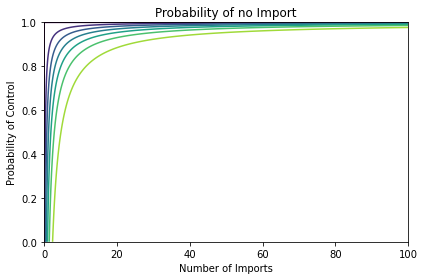

In [4]:
plt.contour(Laran,qran,Fmat)
plt.xlabel('Number of Imports')
plt.ylabel('Probability of Control')
plt.title('Probability of no Import')
plt.tight_layout()

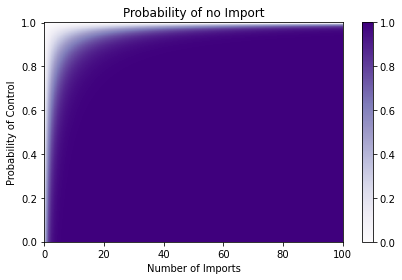

In [5]:
plt.pcolor(Laran,qran,Fmat,cmap='Purples',shading='auto')
plt.xlabel('Number of Imports')
plt.ylabel('Probability of Control')
plt.colorbar()
plt.title('Probability of no Import')
plt.tight_layout()

In [6]:
def myDeltaTau(tD,qq):
    return ((-np.log(1.-qq)/np.log(2))*tD)

In [7]:
qran = np.arange(0,1.001,0.001)
tDran = np.arange(3,21,0.1)
lq = len(qran)
lt = len(tDran)
dtaumat = np.zeros((lq,lt))
for i, q in enumerate(qran):
    for j, t in enumerate(tDran):
        dtaumat[i,j] = myDeltaTau(t,q)

<ipython-input-6-b176d8508058>:2: RuntimeWarning: divide by zero encountered in log
  return ((-np.log(1.-qq)/np.log(2))*tD)


In [ ]:
# Trick is probably to do contour plot - i.e. rearrange the 

In [10]:
cmp = plt.cm.get_cmap('Purples', 512)
newcmp = ListedColormap(cmp(np.linspace(0,1,512))**(6))

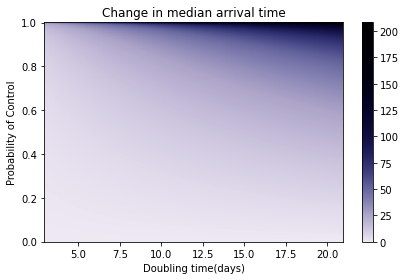

In [11]:
plt.pcolor(tDran,qran,dtaumat,cmap=newcmp,shading='auto')
plt.xlabel('Doubling time(days)')
plt.ylabel('Probability of Control')
plt.colorbar()
plt.title('Change in median arrival time')
plt.tight_layout()

In [12]:
def myq(tD,dtau):
    return (1. - np.exp(-(dtau/tD)*np.log(2)))

In [36]:
dtran = np.array([1., 7., 14., 28., 60.])
tDran = np.arange(0,30.1,0.1)
ld = len(dtran)
lt = len(tDran)
qmat = np.zeros((ld,lt))
for i, d in enumerate(dtran):
    for j, t in enumerate(tDran):
        qmat[i,j] = myq(t,d)

<ipython-input-12-13cb713a5527>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (1. - np.exp(-(dtau/tD)*np.log(2)))


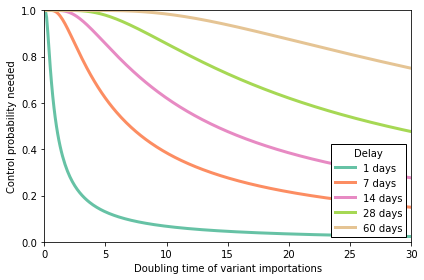

In [67]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for i, d in enumerate(dtran):
    plt.plot(tDran,qmat[i,:],label= str(int(d)) + ' days',c=cmp(i),lw=3)
plt.xlim((np.min(tDran),np.max(tDran)))
plt.ylim((0,1))
plt.legend(title='Delay', loc=4, framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Doubling time of variant importations')
plt.ylabel('Control probability needed')
plt.tight_layout()
plt.savefig('./var_q.pdf')

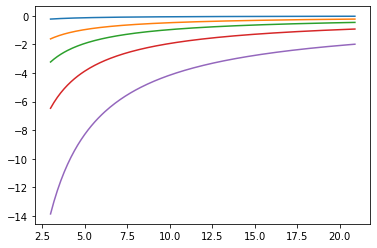

In [18]:
for i, d in enumerate(dtran):
    plt.plot(tDran,np.log(1.-qmat[i,:]))

## Jacob

In [226]:
def deltatau(q, tD):
    return -(np.log(1-q)/np.log(2))*tD

In [293]:
gam = 1/7
R0 = 4
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
beta = R0*gam
cran = np.arange(0,1.01,0.01)
tvec=np.linspace(0, 100)
qt_mat = np.zeros((len(Rvec), len(cran)))
for r, R in enumerate(Rvec):  
    for i, k in enumerate(cran):
        beta = R*gam
        def dp(u, t):
            dpdt = c*beta*np.exp(u[0])
            return np.array((gam-c*beta, dpdt))

        method = ForwardEuler(dp)
        method.set_ic(np.array((0, 0)))
        P, t = method.solver(time_points=tvec)
        qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
        qt_mat[r, i] = qt


tD_vec = np.array([0.5, 1, 3, 5, 7, 10])
dt_mat = np.zeros((len(Rvec), len(tD_vec), np.shape(qt_mat)[1]))
for i, t in enumerate(tD_vec):
    for r, R in enumerate(Rvec):
        dt_mat[r, i, :] = deltatau(qt_mat[r, :], t)

    
    

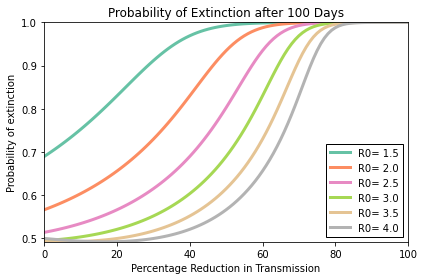

In [300]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for r, R in enumerate(Rvec):
    plt.plot((1-cran)*100, qt_mat[r,:], label= 'R0= ' + str(R),c=cmp(r),lw=3 )
plt.xlim((0,100))
plt.ylim((np.min(qt_mat), 1))
plt.legend(loc=4, framealpha=1., edgecolor='black', fancybox=False)
plt.title('Probability of Extinction after 100 Days')
plt.xlabel('Percentage Reduction in Transmission')
plt.ylabel('Probability of extinction')
plt.tight_layout()
plt.savefig('./var_p.pdf')

(101,) (101,) 0
(101,) (101,) 1
(101,) (101,) 2
(101,) (101,) 3
(101,) (101,) 4
(101,) (101,) 5


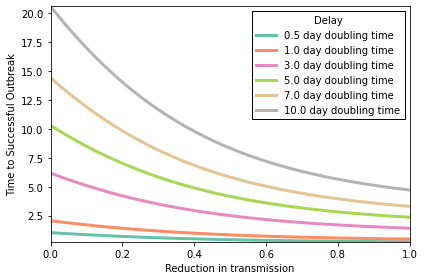

In [282]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for i, d in enumerate(tD_vec):
    plt.plot(cran,dt_mat[r, i, :],label= str(d) + ' day doubling time',c=cmp(i),lw=3)
plt.xlim((0,1))
plt.ylim((np.min(dt_mat[r, :, :]),np.max(dt_mat[r, :, :])))
#plt.ylim((np.min(dt_mat), np.max(dt_mat)))
plt.legend(title='Delay', loc=1, framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Reduction in transmission')
plt.ylabel('Time to Successful Outbreak')
plt.tight_layout()
# plt.savefig('./var_c.pdf')

In [2]:
import scipy.optimize as op

In [407]:

R0 = 2
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
beta = R0*gam
cran = np.arange(0,1.01,0.01)
tvec=np.linspace(0, 100)
qt_vec = np.zeros(len(cran))
Tmax = tvec[-1]
for i, c in enumerate(cran):
    def dp(u, t):
        dpdt = c*beta*np.exp(u[0])
        return np.array((gam-c*beta, dpdt))

    method = ForwardEuler(dp)
    method.set_ic(np.array((0, 0)))
    P, t = method.solver(time_points=tvec)
    qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
    qt_vec[i] = qt
    if beta*c != gam:
        qt_vec[i] = (gam*(1-np.exp((beta*c - gam)*Tmax)))/(gam- beta*c*np.exp((beta*c - gam)*Tmax))
    else:
        qt_vec[i] = 1-1/(gam*Tmax+1)
dtran = np.array([1., 7., 14., 28., 60.])
tDran = np.arange(0.1,10.1,0.1)
ld = len(dtran)
lt = len(tDran)
# qmat = np.zeros((ld,lt))
# qmat_error = np.zeros_like(qmat)
# for i, d in enumerate(dtran):
#     for j, t in enumerate(tDran):
#         def myq_Jacob(clevel):
#             q = (gam*(1-np.exp((beta*clevel-gam)*100)))/(gam-beta*clevel*np.exp(beta*clevel-gam)*100)
#             return 1-np.exp(-(d*(beta/gam - 1))/t) - q
#         qmat[i,j] = op.root_scalar(myq_Jacob,x0=0, x1=1).root
#         qmat_error[i,j]  = myq_Jacob(qmat[i,j].copy())

tD_vec = np.array([0.5, 1, 3, 5, 7, 10])
dt_mat = np.zeros((len(tD_vec), len(qt_vec)))
for i, t in enumerate(tD_vec):
        dt_mat[i, :] = deltatau(qt_vec, t)

This figure is strange - even with a 100% reduction in beta (so that q ~= 1) there is still a finite time until a successful outbreak. Essentially, however, it shold going to infinity like -log(1-q) as q goes to zero. Also q here is interpreted as the probability that an outbreak goes extinct by day Tmax = tvec[-1]

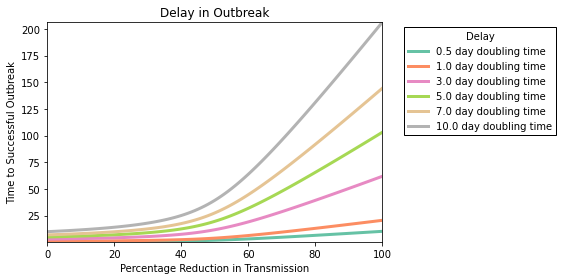

In [409]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(8,4))
for i, d in enumerate(tD_vec):
    plt.plot((1-cran)*100,dt_mat[i, :],label= str(d) + ' day doubling time',c=cmp(i),lw=3)
plt.xlim((0,100))
plt.ylim((np.min(dt_mat),np.max(dt_mat)))
#plt.ylim((np.min(dt_mat), np.max(dt_mat)))
plt.legend(title='Delay', loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Percentage Reduction in Transmission')
plt.ylabel('Time to Successful Outbreak')
plt.title("Delay in Outbreak")
plt.tight_layout()
plt.savefig('./var_c.pdf')

myq_Jacob(0.51)

In [377]:
c=0
def dp(u, t):
    dpdt = c*beta*np.exp(u[0])
    return np.array((gam-c*beta, dpdt))

method = ForwardEuler(dp)
method.set_ic(np.array((0, 0)))
P, t = method.solver(time_points=tvec)
qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
dt = 10
deltatau(qt, dt)

206.0992915567707

In [472]:

# =============================================================================
# Class for solving ODEs
# =============================================================================
class ODESolver:
    def __init__(self, f):
        self.f = f
    
    def advance(self):
        raise NotImplementedError
    
    def set_ic(self, u0):
        if not isinstance(u0, float):
            self.u0 = u0.astype(float)
        else:
            self.u0 = u0
    
    def solver(self, time_points):
        self.t = np.asarray(time_points)
        self.tlen = len(self.t)
        self.numeqs = np.shape(self.u0)[0]
        self.u = np.zeros((self.numeqs, self.tlen))
        self.u[:,0] = self.u0
        for k in range(0,self.tlen-1):
            self.k=k
            self.u[:, k+1] = self.advance()
        return self.u, self.t
    

class ForwardEuler(ODESolver): # Runs faster than Runge Kutta
    def advance(self):
        u, f, k, t = self.u, self.f, self.k, self.t
        dt = t[k+1] - t[k]
        unew = u[:, k] + dt*f(u[:, k], t[k])
        return unew

class RungeKutta4(ODESolver): # Alternatively, can use Runge Kutta (may be preferable to Euler if inhomogeneous rates are particularly pathological)
    def advance(self):
        u, f, k, t = self.u, self.f, self.k, self.t
        numeqs = np.shape(u)[0]
        dt = t[k+1]-t[k]
        dt2 = dt/2.0
        unew = np.zeros(numeqs)
        
        K1 = dt*f(u[:, k], t[k])
        K2 = dt*f(u[:, k] + 0.5*K1, t[k]+dt2)
        K3 = dt*f(u[:, k] + 0.5*K2, t[k] + dt2)
        K4 = dt*f(u[:, k] + K3, t[k] + dt)
    
        unew = u[:, k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
        return unew
    
    

In [655]:
  
# =============================================================================
# Class for extinction probability of multi-type branching process (MTBP)
# =============================================================================

class MTBP_extinct:
    def __init__(self, offspring):
        self.offspring = offspring
    def set_lifespans(self, omega):
        self.omega = omega
    def set_immigration(self, eta):
        
        self.eta = eta
    
    def set_odes(self, u, t):
        omega = self.omega
        P = self.offspring
        eta = self.eta
        if isinstance(eta(t), float):
            self.numeqs=1
            deriv = np.zeros(self.numeqs + 1)
            deriv[0] = -omega(t)*u[0] + omega(t)*P(u[0:-1], t)[0]
            sumqs = eta(t)*u[0]
            deriv[-1] = -np.sum(eta(t))*u[-1] + u[-1]*sumqs
        else:
            self.numeqs = len(eta(t))
            sumqs = 0
            deriv = np.zeros(self.numeqs + 1)
            for i in range(0, self.numeqs):
                deriv[i] = -omega(t)[i]*u[i] + omega(t)[i]*P(u[0:-1], t)[i]

                sumqs += eta(t)[i]*u[i]

            deriv[-1] = -np.sum(eta(t))*u[-1] + u[-1]*sumqs

        return deriv

    def solve_odes(self, set_odes, t, ics, n0, methodclass=ForwardEuler, Full = False):
        method = methodclass(set_odes)
        method.set_ic(u0=ics)
        R, t = method.solver(time_points=t)
        numqs = np.shape(R)[0] - 1
        tlen = len(t)
        Qprod = np.ones(tlen)
        r = R[-1,:]
        if isinstance(n0, float):
            for i in range(0, numqs):
                Qprod *= R[i,:]**(n0)
        else:
            for i in range(0, numqs):
                Qprod *= R[i,:]**(n0[i])
        rho = r*Qprod
        sol = np.stack((Qprod, rho), axis=0)
        if Full:
            return R
        else:
            return sol
    
    def time_to_pextinct(self, t, p, sol):
        rho = sol[-1,:]
        numqs = np.shape(sol)[0] - 1
        q = np.ones_like(rho)
        for i in range(0, numqs):
            q*=sol[i, :]
        if isinstance(p, float):
            qwhere = np.where(q>=p)[0]
            rhowhere = np.where(rho>=p)[0]
            if len(qwhere)>0:
                qmin = np.min(t[np.where(q>=p)])
            else:
                qmin = np.inf
            if (len(rhowhere)>0) and (rho[-1]>=p):
                rhomin = np.min(t[np.where(rho>=p)])
            else:
                rhomin =  np.inf
            return np.array((qmin, rhomin))
        elif len(p)>1:
            qmin = np.zeros_like(p)
            rhomin = np.zeros_like(p)
            extinct_times = np.zeros((len(p), 2)) 
            for j in range(0, len(p)):
                qwhere = np.where(q>=p[j])[0]
                rhowhere = np.where(rho>=p[j])[0]
                if len(qwhere)>0:
                    qmin[j] = np.min(t[np.where(q>=p[j])])
                else:
                    qmin[j] = np.inf
                if (len(rhowhere)>0) and (rho[-1]>=p[j]):
                    rhomin[j] = np.min(t[np.where(rho>=p[j])])
                else:
                    rhomin[j] =  np.inf
            extinct_times[:,0] = qmin
            extinct_times[:,1] = rhomin
            return(extinct_times)
    
    def qr_final(self, sol):
        sol = sol[-1,:]
        q_final = np.prod(sol[0:-1,-1])
        rho_final = sol[-1, -1]
        return [q_final, rho_final]

In [683]:
time = np.linspace(0, 100)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
kran = np.arange(0.1, 1.1, 0.01)
k = 1/10
lr = len(Rvec)

etaran = np.arange(1/100, 1., 0.01)
le = len(etaran)
n0= 0.
ics = np.array((0., 1.)) # Should always be 0 for q, 1 for r
rho_mat = np.zeros((lr, len(time)))
rho_final_mat = np.zeros((lr, le))
del_mat = np.zeros_like(rho_final_mat)
for r, R in enumerate(Rvec):
    beta = R*gam
    def omega(t):
        return beta + gam
    for e, im in enumerate(etaran):
        def eta(t):
            return float(im) # Immigration rate
        def P(u, t):
            p = (beta/(beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(beta+gam)
            return p
        offspring = P
        outbreak = MTBP_extinct(offspring)
        outbreak.set_lifespans(omega)
        outbreak.set_immigration(eta)
        
        rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0)
        rho_mat[r, :] = rho[-1,:] 
        rho_final_mat[r, e] = rho[-1,-1]


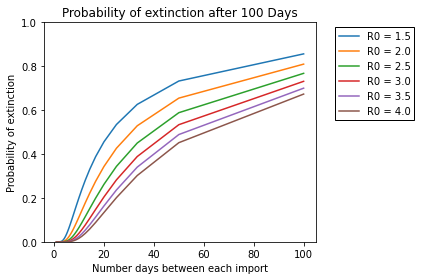

In [684]:
for r, R in enumerate(Rvec):
    plt.plot(1/etaran, rho_final_mat[r,:], label = 'R0 = ' + str(R))
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Number days between each import')
plt.ylabel('Probability of extinction')
plt.title("Probability of extinction after " + str(int(Tmax)) + " Days")
# plt.xlim((0.0,1))
plt.ylim((0, 1))
plt.tight_layout()
plt.savefig('./var_im.pdf')


In [666]:
time = np.linspace(0, 100)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
kvec = np.array((1/10, 1., 10.)) # Different dispersion parameters - large k corresponds to 
cran = np.arange(0., 1.01, 0.01)
# cran = np.array((0, 1))
lc = len(cran)
k = 1/10
lr = len(Rvec)
def eta(t):
    return float(1/50.) # Immigration rate
etaran = np.arange(1/100, 2., 0.01)
le = len(etaran)
n0= 0.
ics = np.array((0., 1.)) # Should always be 0 for q, 1 for r
rho_mat = np.zeros((lr, len(time)))
rho_final_mat = np.zeros((lr, lc))
del_mat = np.zeros_like(rho_final_mat)
for r, R in enumerate(Rvec):
    beta = R*gam
    def omega(t):
        return beta + gam
    for i, c in enumerate(cran):
        def P(u, t):
            p = (c*beta/(c*beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(c*beta+gam)
            return p
        offspring = P
        outbreak = MTBP_extinct(offspring)
        outbreak.set_lifespans(omega)
        outbreak.set_immigration(eta)
        
        rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0)
        rho_mat[r, :] = rho[-1,:] 
        rho_final_mat[r, i] = rho[-1,-1]


<ipython-input-666-65da8df2d88d>:26: RuntimeWarning: invalid value encountered in power
  p = (c*beta/(c*beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(c*beta+gam)


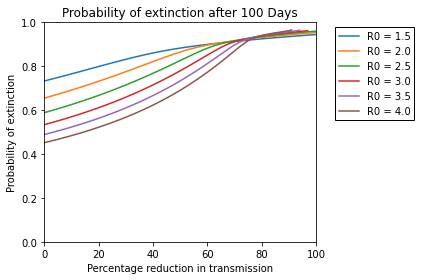

In [667]:
for r, R in enumerate(Rvec):
    plt.plot((1-cran)*100, rho_final_mat[r,:], label = 'R0 = ' + str(R))
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Percentage reduction in transmission')
plt.ylabel('Probability of extinction')
plt.title("Probability of extinction after " + str(int(Tmax)) + " Days")
plt.xlim((0.0,100.))
plt.ylim((0, 1))
plt.tight_layout()
plt.savefig('./var_c_SSE.pdf')

In [687]:
time = np.linspace(0, 100, 100)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
# kran = np.arange(0.1, 1.1, 0.01)
cran = np.arange(0., 1.01, 0.01)
# cran = np.array((0, 1))
lc = len(cran)
k = 1/10
lr = len(Rvec)
def eta(t):
    return np.exp((1/100)*t) # Immigration rate
# etaran = np.arange(1/100, 2., 0.01)
le = len(etaran)
n0= 0.
ics = np.array((0., 1.)) # Should always be 0 for q, 1 for r
rho_mat = np.zeros((lr, len(time)))
for r, R in enumerate(Rvec):
    beta = R*gam
    def omega(t):
        return beta + gam
   
    def P(u, t):
        p = (beta/(beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(beta+gam)
        return p
    offspring = P
    outbreak = MTBP_extinct(offspring)
    outbreak.set_lifespans(omega)
    outbreak.set_immigration(eta)

    rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0)
    rho_mat[r, :] = rho[-1,:] 


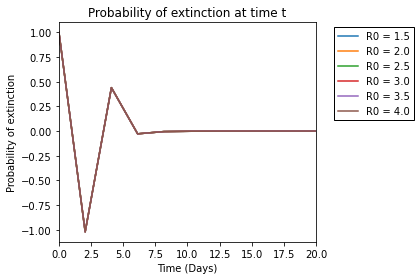

In [686]:
for r, R in enumerate(Rvec):
    plt.plot(time, rho_mat[0,:], label = 'R0 = ' + str(R))
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Time (Days)')
plt.ylabel('Probability of extinction')
plt.title("Probability of extinction at time t")
plt.xlim((0.0, 20))
# plt.ylim((0, 1))
plt.tight_layout()
plt.savefig('./exponential_Im.pdf')

In [690]:
eta(100)

2.718281828459045